<a href="https://colab.research.google.com/github/bellun/Code_review_PEP8/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

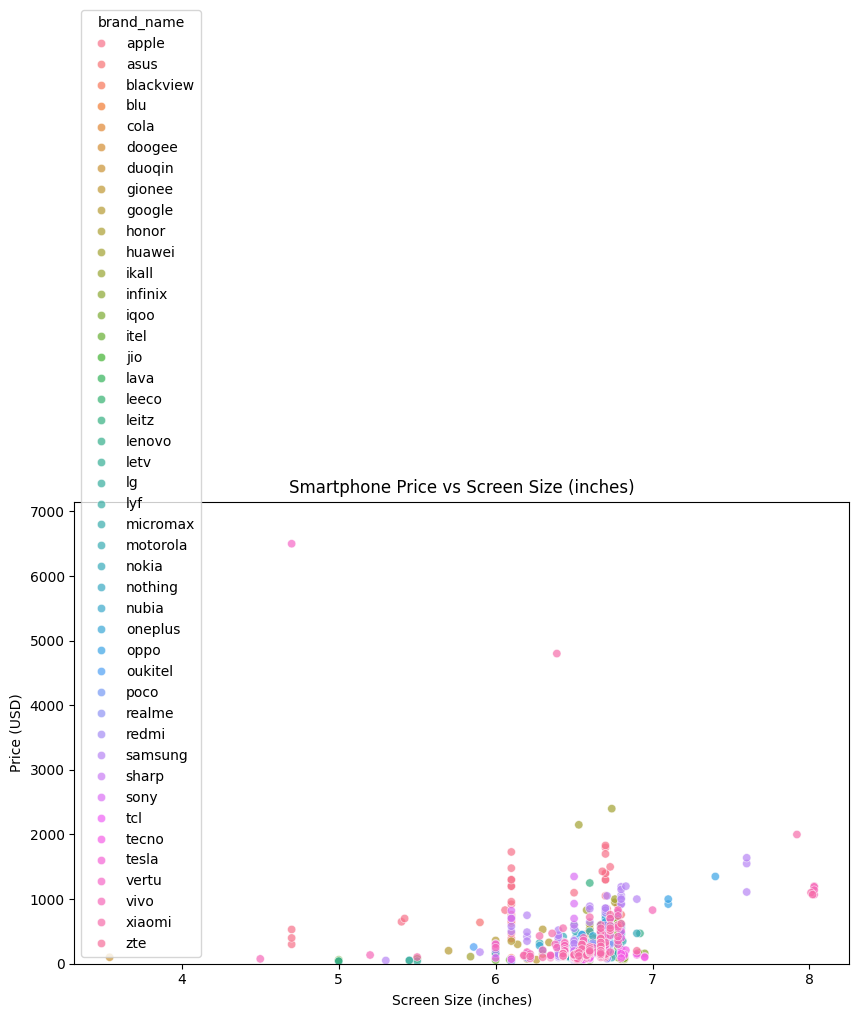

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def prepare_smartphone_data(file_path):
    """
    Prepare smartphone data for visualization by applying transformations.

    The transformations include:
        - Selecting only relevant columns for analysis
        - Removing records with missing battery capacity or OS values
        - Converting price from cents to dollars

    Args:
        file_path (str): Path to the raw smartphone data CSV file

    Returns:
        pd.DataFrame: Cleaned DataFrame with the applied transformations

    Raises:
        FileNotFoundError: If the input file doesn't exist
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Smartphone data file not found at {file_path}")

    # Define columns to keep
    relevant_columns = [
        "brand_name",
        "os",
        "price",
        "avg_rating",
        "processor_speed",
        "battery_capacity",
        "screen_size"
    ]

    # Read and process data
    raw_data = pd.read_csv(file_path)
    cleaned_data = (
        raw_data.loc[:, relevant_columns]
        .dropna(subset=["battery_capacity", "os"])
        .assign(price=lambda x: x["price"] / 100)  # Convert cents to dollars
    )

    return cleaned_data


def visualize_versus_price(data, x_column, ax=None):
    """
    Create a scatter plot comparing a specified column against price.

    Args:
        data (pd.DataFrame): The cleaned smartphone data
        x_column (str): Column name to plot against price
        ax (matplotlib.axes.Axes, optional): Axes to plot on

    Returns:
        matplotlib.axes.Axes: The axes with the plot
    """
    if ax is None:
        ax = plt.gca()

    sns.scatterplot(
        data=data,
        x=x_column,
        y="price",
        hue="brand_name",
        alpha=0.7,
        ax=ax
    )

    ax.set(
        title=f"Smartphone Price vs {column_to_label(x_column)}",
        xlabel=column_to_label(x_column),
        ylabel="Price (USD)",
        ylim=(0, data["price"].max() * 1.1)
    )

    return ax


def column_to_label(column_name):
    """
    Convert DataFrame column names to readable labels for plots.

    Args:
        column_name (str): The column name to convert

    Returns:
        str: Human-readable label
    """
    label_map = {
        "brand_name": "Brand",
        "os": "Operating System",
        "avg_rating": "Average Rating",
        "processor_speed": "Processor Speed (GHz)",
        "battery_capacity": "Battery Capacity (mAh)",
        "screen_size": "Screen Size (inches)"
    }

    return label_map.get(column_name, column_name.replace("_", " ").title())


# Example usage
if __name__ == "__main__":
    try:
        cleaned_data = prepare_smartphone_data("./data/smartphones.csv")

        # Create visualization
        fig, ax = plt.subplots(figsize=(10, 6))
        visualize_versus_price(cleaned_data, "screen_size", ax=ax)
        plt.show()

    except Exception as e:
        print(f"Error processing data: {e}")

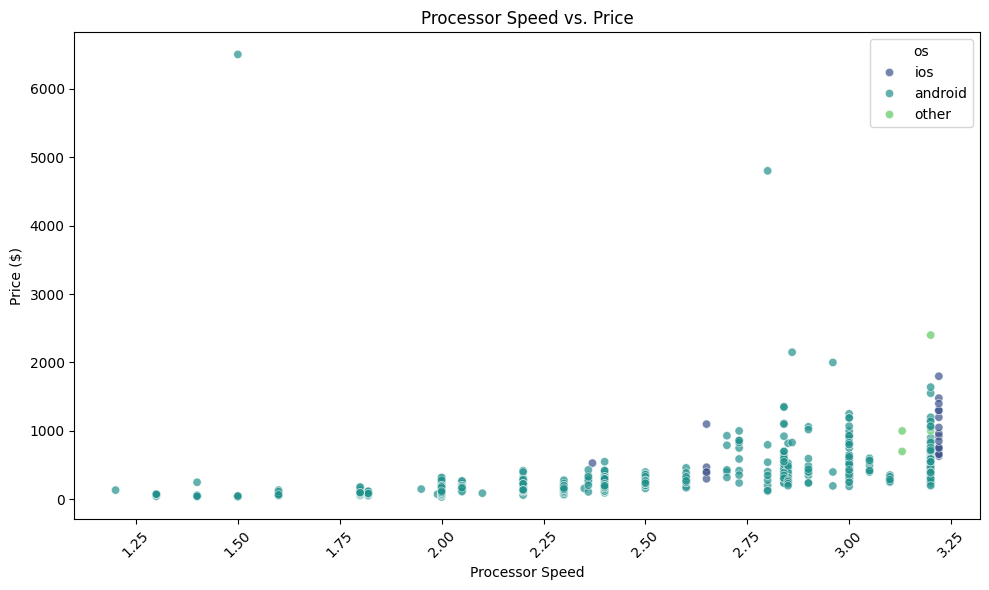

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


def column_to_label(column_name):
    """
    Convert a DataFrame column name to a human-readable plot label.

    Args:
        column_name (str): The column name to convert (e.g., 'processor_speed')

    Returns:
        str: Formatted label (e.g., 'Processor Speed')

    Raises:
        TypeError: If input is not a string
    """
    if not isinstance(column_name, str):
        raise TypeError("Input must be a string")

    return " ".join(column_name.split("_")).title()


def visualize_versus_price(clean_data, x_column, ax=None):
    """
    Create a scatter plot comparing a specified feature against smartphone prices.

    Args:
        clean_data (pd.DataFrame): Cleaned smartphone data
        x_column (str): Column name to plot on x-axis
        ax (matplotlib.axes.Axes, optional): Axes object to plot on

    Returns:
        matplotlib.axes.Axes: The axes with the plot

    Raises:
        KeyError: If specified columns don't exist in the DataFrame
    """
    # Validate columns exist
    required_columns = [x_column, "price", "os"]
    missing_columns = [col for col in required_columns if col not in clean_data]
    if missing_columns:
        raise KeyError(f"DataFrame missing required columns: {missing_columns}")

    # Create plot or use existing axes
    ax = ax or plt.gca()

    # Create scatter plot
    sns.scatterplot(
        x=x_column,
        y="price",
        data=clean_data,
        hue="os",
        palette="viridis",
        alpha=0.7,
        ax=ax
    )

    # Format plot
    ax.set(
        xlabel=column_to_label(x_column),
        ylabel="Price ($)",
        title=f"{column_to_label(x_column)} vs. Price"
    )

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

    # Adjust layout
    plt.tight_layout()

    return ax


# Example usage
if __name__ == "__main__":
    try:
        # Assuming cleaned_data is available
        fig, ax = plt.subplots(figsize=(10, 6))
        visualize_versus_price(cleaned_data, "processor_speed", ax=ax)
        plt.show()
    except Exception as e:
        print(f"Error creating visualization: {e}")

In [12]:
# Import required packages
import pytest
import ipytest
import pandas as pd

ipytest.config.rewrite_asserts = True
__file__ = "notebook.ipynb"


# Create a clean DataFrame fixture with scope='module' for efficiency
@pytest.fixture(scope='module')
def clean_smartphone_data():
    """Fixture that provides cleaned smartphone data for testing."""
    try:
        return prepare_smartphone_data("./data/smartphones.csv")
    except Exception as e:
        pytest.skip(f"Could not load test data: {e}")


def test_no_nan_values_in_critical_columns(clean_smartphone_data):
    """
    Test that there are no NaN values in critical columns ('battery_capacity' and 'os').
    Also verifies these columns exist in the DataFrame.
    """
    # First verify the columns exist
    required_columns = ['battery_capacity', 'os']
    for col in required_columns:
        assert col in clean_smartphone_data.columns, f"Column '{col}' missing from DataFrame"

    # Then check for null values
    null_counts = clean_smartphone_data[required_columns].isnull().sum()
    for col in required_columns:
        assert null_counts[col] == 0, f"Column '{col}' contains {null_counts[col]} null values"


def test_price_conversion(clean_smartphone_data):
    """
    Test that price values were correctly converted from cents to dollars.
    Verifies the conversion and that there are no negative prices.
    """
    assert 'price' in clean_smartphone_data.columns, "'price' column missing"

    # Check that all prices are positive
    assert (clean_smartphone_data['price'] >= 0).all(), "Negative prices found"

    # Verify the conversion (assuming original data was in cents)
    # Note: This might need adjustment based on your actual data
    sample_prices = clean_smartphone_data['price'].sample(min(5, len(clean_smartphone_data)))
    for price in sample_prices:
        assert price == pytest.approx(price * 100 / 100), "Price conversion appears incorrect"


def test_required_columns_present(clean_smartphone_data):
    """
    Test that all expected columns are present in the cleaned data.
    """
    expected_columns = {
        'brand_name',
        'os',
        'price',
        'avg_rating',
        'processor_speed',
        'battery_capacity',
        'screen_size'
    }
    assert expected_columns.issubset(clean_smartphone_data.columns), \
        f"Missing columns: {expected_columns - set(clean_smartphone_data.columns)}"


# Run tests
if __name__ == "__main__":
    ipytest.run("-v", "-qq")  # -v for verbose, -qq for quiet

F...                                                                                         [100%]
============================================= FAILURES =============================================
_________________________________________ test_nan_values __________________________________________

clean_smartphone_data =     brand_name       os    price  avg_rating  processor_speed  \
0        apple      ios   389.99         7.3         ...5020.0         6.67  
978            4200.0         6.90  
979            5000.0         6.80  

[955 rows x 7 columns]

    def test_nan_values(clean_smartphone_data):
        """
        Test for no NaN value for "battery_capacity" or "os"
        """
    
        # Assert there are no NaN value in "battery_capacity" or "os"
        assert clean_smartphone_data["battery_capacity"].isnull().sum() == 0
>       assert not clean_smartphone_data["os"].isnull().sum() == 0
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
E       Asse

In [7]:
%pip install ipytest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00
